### Random Forest_Fraud Check

In [1]:
## Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.columns = ['Undergrad', 'MaritalStatus', 'TaxableIncome', 'CityPopulation', 'WorkExperience', 'Urban']
data.tail()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


{'whiskers': [<matplotlib.lines.Line2D at 0x156a661cdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x156a667cbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x156a490ff70>],
 'medians': [<matplotlib.lines.Line2D at 0x156a56e92b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x156a6340790>],
 'means': []}

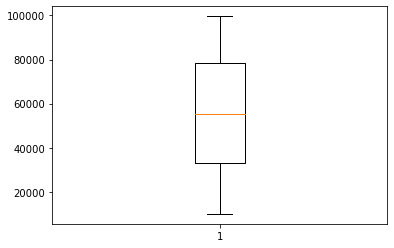

In [8]:
plt.boxplot(data['TaxableIncome'])

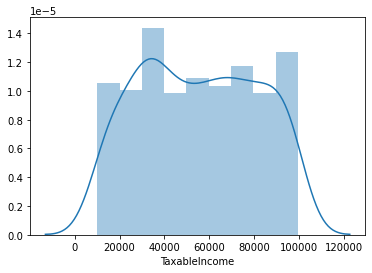

In [9]:
sns.distplot(data['TaxableIncome'])

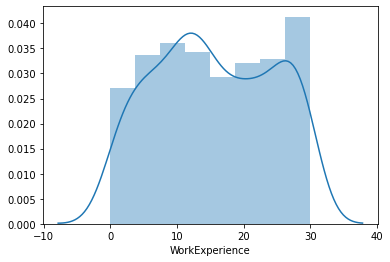

In [10]:
sns.distplot(data['WorkExperience'])

#### Converting Continous data to Categorical data of Class Variable i.e., Taxable Income

In [14]:
Status = pd.cut(data['TaxableIncome'], bins=(-1003, 30000, 99620), labels=('Risky', 'Good'))
Status.tail(10)

590     Good
591    Risky
592     Good
593     Good
594     Good
595     Good
596     Good
597     Good
598     Good
599     Good
Name: TaxableIncome, dtype: category
Categories (2, object): [Risky < Good]

In [16]:
data['Status'] = Status
data.head(3)

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good


In [17]:
data.drop(columns='TaxableIncome', inplace= True)
data.tail(2)

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Status
598,YES,Married,180083,17,NO,Good
599,NO,Divorced,158137,16,NO,Good


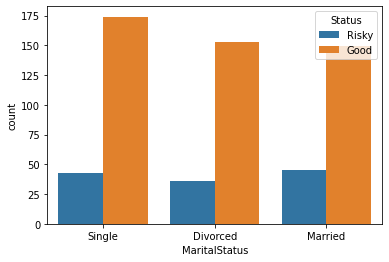

In [18]:
sns.countplot(x = 'MaritalStatus', hue='Status', data=data)

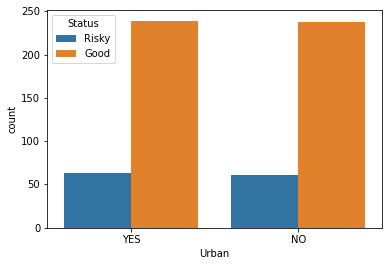

In [19]:
sns.countplot(x = 'Urban', hue='Status', data=data)

In [20]:
X = data.iloc[:, 0:5]
Y = data['Status']
X.head()

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


In [21]:
Y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Status, dtype: category
Categories (2, object): [Risky < Good]

In [23]:
## One Hot Encoding
X = pd.get_dummies(X)
X.head(3)

,CityPopulation,WorkExperience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1


In [27]:
cols = X.columns
cols

Index(['CityPopulation', 'WorkExperience', 'Undergrad_NO', 'Undergrad_YES',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scalar = StandardScaler()

In [29]:
### Normalizing data
X_norm = scalar.fit_transform(X)
X_norm

array([[-1.17852072, -0.62914254,  1.040833  , ...,  1.32852435,
        -0.99335541,  0.99335541],
       [ 0.50850002,  0.27636996, -0.96076892, ..., -0.75271484,
        -0.99335541,  0.99335541],
       [ 1.03310911,  1.63463872,  1.040833  , ..., -0.75271484,
        -0.99335541,  0.99335541],
       ...,
       [ 0.90969648, -1.76103318,  1.040833  , ..., -0.75271484,
        -0.99335541,  0.99335541],
       [ 1.43219749,  0.1631809 , -0.96076892, ..., -0.75271484,
         1.00668904, -1.00668904],
       [ 0.9915901 ,  0.04999184,  1.040833  , ..., -0.75271484,
         1.00668904, -1.00668904]])

In [31]:
X = pd.DataFrame(X_norm, columns=cols)
X.head()

,CityPopulation,WorkExperience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,-1.178521,-0.629143,1.040833,-1.040833,-0.678125,-0.691254,1.328524,-0.993355,0.993355
1,0.508500,0.276370,-0.960769,0.960769,1.474654,-0.691254,-0.752715,-0.993355,0.993355
2,1.033109,1.634639,1.040833,-1.040833,-0.678125,1.446646,-0.752715,-0.993355,0.993355
3,1.696831,-0.063197,-0.960769,0.960769,-0.678125,-0.691254,1.328524,-0.993355,0.993355
4,-1.630532,1.408261,1.040833,-1.040833,-0.678125,1.446646,-0.752715,1.006689,-1.006689


In [32]:
## Splitting Data into train and test
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1 )
X_train.head()

,CityPopulation,WorkExperience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
82,0.046591,1.181882,1.040833,-1.040833,1.474654,-0.691254,-0.752715,-0.993355,0.993355
568,0.828947,0.729126,1.040833,-1.040833,-0.678125,-0.691254,1.328524,-0.993355,0.993355
347,-0.557261,-1.761033,1.040833,-1.040833,-0.678125,1.446646,-0.752715,-0.993355,0.993355
544,0.504525,0.615937,1.040833,-1.040833,-0.678125,-0.691254,1.328524,-0.993355,0.993355
34,1.506161,-1.647844,-0.960769,0.960769,1.474654,-0.691254,-0.752715,-0.993355,0.993355


In [34]:
X_test.shape

(120, 9)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [37]:
n_trees = 150
max_features = 5
fold = KFold(n_splits=10)

#### Model Builiding - Random Forest

In [39]:
model1 = RandomForestClassifier(n_estimators=n_trees, max_features=max_features)
model1.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=150)

In [45]:
pred_train = model1.predict(X_train)
pred_train[1:10]

array(['Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good'], dtype=object)

In [46]:
pred_test = model1.predict(X_test)
pred_test[1:20]

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good'], dtype=object)

In [50]:
results_train = cross_val_score(model1, X_train, y_train, cv=fold)
train_acc = (results_train.mean()*100).round(3)

74.583

In [51]:
train_acc

74.583

In [54]:
results_test = cross_val_score(model1, X_test, y_test, cv=fold)
test_acc = (results_test.mean()*100).round(3)

In [55]:
test_acc

71.667

In [56]:
imp_feature = pd.Series(model1.feature_importances_, index=X.columns).sort_values(ascending= False)
imp_feature

CityPopulation            0.514172
WorkExperience            0.298272
MaritalStatus_Married     0.030137
MaritalStatus_Divorced    0.027347
Urban_YES                 0.027254
Urban_NO                  0.027189
Undergrad_NO              0.026637
Undergrad_YES             0.026546
MaritalStatus_Single      0.022447
dtype: float64

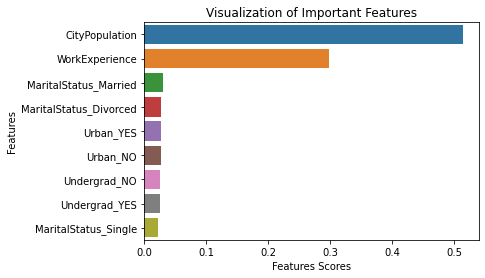

In [57]:
## Visualizing the best features
sns.barplot(x = imp_feature, y=imp_feature.index)
plt.xlabel('Features Scores')
plt.ylabel('Features')
plt.title('Visualization of Important Features')
plt.show()

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
num_trees = 10
fold = KFold(n_splits=10)

#### Model Building -  AdaBoost (Boosting)

In [60]:
model2 = AdaBoostClassifier(n_estimators=num_trees)

In [61]:
model2.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10)

In [63]:
train_pred = model2.predict(X_train)
train_pred[1:10]

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good'], dtype=object)

In [65]:
test_pred = model2.predict(X_test)
test_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [67]:
r_train = cross_val_score(model2, X_train, y_train, cv = fold)
acc_train = (r_train.mean()*100).round(3)

In [68]:
acc_train

78.958

In [69]:
r_test = cross_val_score(model2, X_test, y_test, cv=fold)
acc_test = (r_test.mean()*100).round(3)

In [71]:
acc_test

74.167

In [73]:
mod_acc = {'Model': ['Model_1_Train', 'Model_1_Test', 'Model_2_Train', 'Model_2_Test'], 'Accuracy': [train_acc, test_acc, acc_train, acc_test]}

In [74]:
## Accuracy Table.
acc_df = pd.DataFrame(mod_acc)
acc_df

,Model,Accuracy
0,Model_1_Train,74.583
1,Model_1_Test,71.667
2,Model_2_Train,78.958
3,Model_2_Test,74.167
